In [1]:
%cd ..

/Users/belart/code/pkr/cfr


In [2]:
from typing import cast

from zerosum.pkr.game import RiverOfBlood, Fold, Call, Allin, Draw, Bet, Flop, RaisePot, Check, RaiseHalfPot
from zerosum import Runner
from zerosum.game import normalize

from blood.h8a20d30p import Abstraction

In [3]:
g = Abstraction().apply(Draw((0, 0))).apply(Draw((0, 0)))
g.infoset(g.active).actions()

(Fold(), Call(), RaisePot(), Allin())

In [4]:
runner = Runner.load("bloods/h8a20d30p.pkl", Abstraction, 1000000)

In [5]:
from collections import defaultdict
from tqdm import tqdm
import numpy as np

table = defaultdict(list)
actions = {RaisePot(): 0.0, Fold(): 0, Call(): 0, Allin(): 0}

for i in tqdm(range(52)):
    for j in range(i + 1, 52):
        if i == j:
            continue

        ri, si = divmod(i, 4)
        rj, sj = divmod(j, 4)

        g = Abstraction().apply(Draw((i, j))).apply(Draw((i, j)))
        infoset = g.infoset(g.active)
        try:
            s = runner.impl.strategies[infoset]
        except KeyError:
            continue
        s = normalize(s)

        l, r = 12 - min(ri, rj), 12 - max(ri, rj)
        if si == sj:
            ix = r, l
        else:
            ix = l, r

        action = max(s, key=s.__getitem__)
        actions[action] += 1 / 1326
        would = isinstance(action, (Fold,))
        table[ix].append(1 if would else 0)

for k, v in actions.items():
    print(f"{k.__class__.__name__}: {round(100 * v, 2)}%")

100%|██████████| 52/52 [00:00<00:00, 72.70it/s]

RaisePot: 32.35%
Fold: 40.72%
Call: 15.08%
Allin: 11.84%


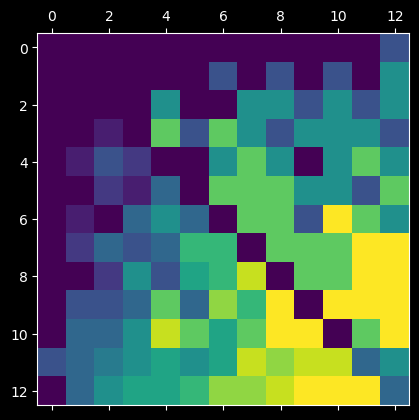

In [6]:
tab = np.zeros((13, 13))
# for (i, j), v in tables[False].items():
for (i, j), v in table.items():
    tab[i, j] = np.mean(v)

import matplotlib.pyplot as plt
plt.matshow(tab, vmin=0, vmax=1)